In [254]:
install.packages("corrplot")
install.packages("party")
install.packages("pROC")
install.packages("mboost")
install.packages("ggalluvial")
install.packages("car")
install.packages("caTools")
install.packages("dummies")
install.packages("gridExtra")
install.packages("e1071")
install.packages("ROCR")

library(data.table)
library(plyr)
library(dplyr)
library(ggplot2)
library(caret)
library(corrplot)
library(MASS)
library(randomForest)
library(party)
library(caret)
library(MASS)
library(pROC)
library(mboost)
library(ggalluvial)
library(car)
library(caTools)
library(dummies)
library(gridExtra)
library(ROCR)
library(e1071)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [255]:
data <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(data)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [257]:
table(data$Department)


       Human Resources Research & Development                  Sales 
                    63                    961                    446 

In [258]:
summary(data)

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

In [259]:
sapply(data, function(x) sum(is.na(x)))

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField            EmployeeCount 
                       0                        0                        0 
          EmployeeNumber  EnvironmentSatisfaction                   Gender 
                       0                        0                        0 
              HourlyRate           JobInvolvement                 JobLevel 
                       0                        0                        0 
                 JobRole          JobSatisfaction            MaritalStatus 
                       0                        0                        0 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                       0                        0                        0 
                  Over18                 OverTime        PercentSalaryHike 
                       0                        0                        0 
       PerformanceRating RelationshipSatisfaction            StandardHours 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

In [234]:
head(data)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [235]:
table(data$Attrition)


  No  Yes 
1233  237 

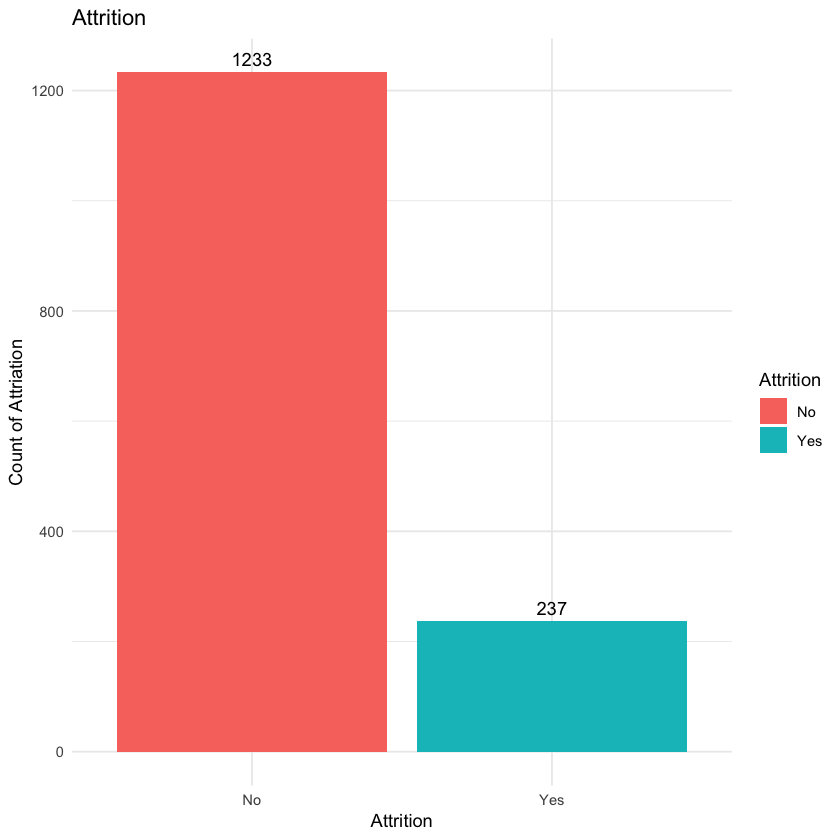

In [260]:
data %>%
        group_by(Attrition) %>%
        tally() %>%
        ggplot(aes(x = Attrition, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Attrition", y="Count of Attriation")+
        ggtitle("Attrition")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))

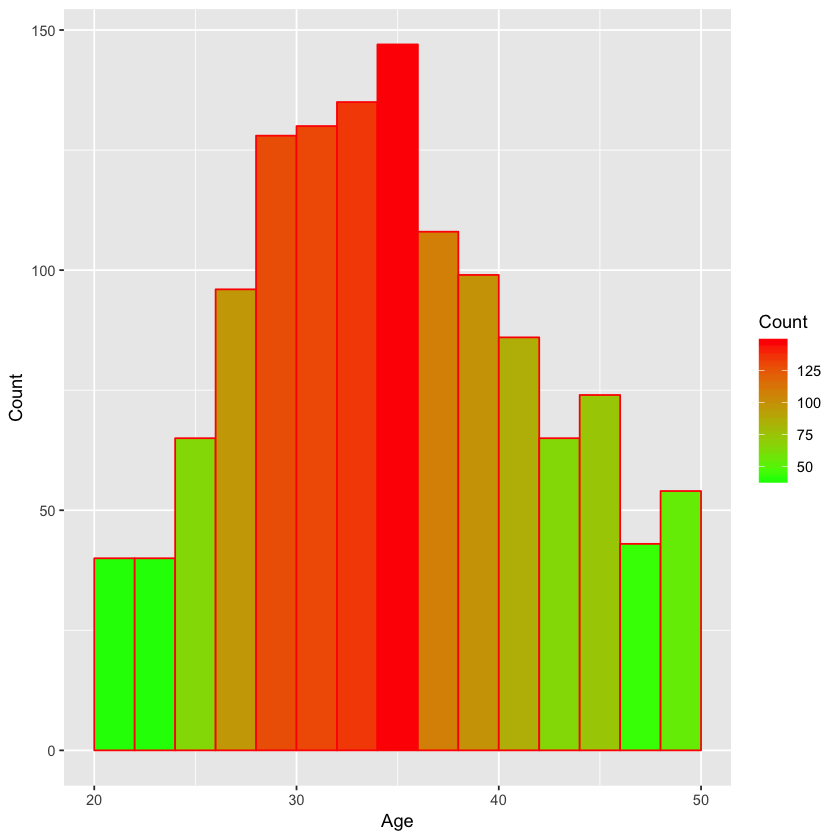

In [261]:
ggplot(data=data, aes(data$Age)) + 
        geom_histogram(breaks=seq(20, 50, by=2), 
                       col="red", 
                       aes(fill=..count..))+
        labs(x="Age", y="Count")+
        scale_fill_gradient("Count", low="green", high="red")

In [262]:
data$Education <- factor(data$Education)
data$EnvironmentSatisfaction <- factor(data$EnvironmentSatisfaction)
data$JobInvolvement <- factor(data$JobInvolvement)
data$JobLevel <- factor(data$JobLevel)
data$JobSatisfaction <- factor(data$JobSatisfaction)
data$PerformanceRating <- factor(data$PerformanceRating)
data$RelationshipSatisfaction <- factor(data$RelationshipSatisfaction)
data$StockOptionLevel <- factor(data$StockOptionLevel)
data$WorkLifeBalance <- factor(data$WorkLifeBalance)
data$Attrition  <-  as.factor(data$Attrition)
data$EducationField  <-  as.factor(data$EducationField)
data$BusinessTravel  <-  as.factor(data$BusinessTravel)
data$Department  <-  as.factor(data$Department)
data$JobRole  <-  as.factor(data$JobRole)
data$Over18  <-  as.factor(data$Over18)
data$OverTime  <-  as.factor(data$OverTime)
data$MaritalStatus  <-  as.factor(data$MaritalStatus)
data$Gender  <-  as.factor(data$Gender)
data$JobRole <- mapvalues(data$JobRole, from = c("Healthcare Representative",
                                                 "Human Resources",
                                                 "Laboratory Technician",
                                                 "Manager",
                                                 "Manufacturing Director",
                                                 "Research Director",
                                                 "Research Scientist",
                                                 "Sales Executive",
                                                 "Sales Representative"),
                                            to = c('healthcarerepresentative',
                                                 'humanresources',
                                                 'laboratorytechnician',
                                                 'manager',
                                                 'manufacturingdirector',
                                                 'researchdirector',
                                                 'researchscientist',
                                                 'salesexecutive',
                                                 'salesrepresentative'))


In [263]:
table(data$JobRole)


healthcarerepresentative           humanresources     laboratorytechnician 
                     131                       52                      259 
                 manager    manufacturingdirector         researchdirector 
                     102                      145                       80 
       researchscientist           salesexecutive      salesrepresentative 
                     292                      326                       83 

In [266]:
table(data$Education)


  1   2   3   4   5 
170 282 572 398  48 

In [297]:
table(data$DistanceFromHome)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
208 211  84  64  65  59  84  80  85  86  29  20  19  21  26  32  20  26  22  25 
 21  22  23  24  25  26  27  28  29 
 18  19  27  28  25  25  12  23  27 

In [298]:
data$DistanceFromHome <- ifelse(data$DistanceFromHome < 11,"Near",ifelse(data$DistanceFromHome < 21,"middle","far"))

In [299]:
table(data$DistanceFromHome)


   far middle   Near 
   204    240   1026 

In [268]:
colnames(data)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


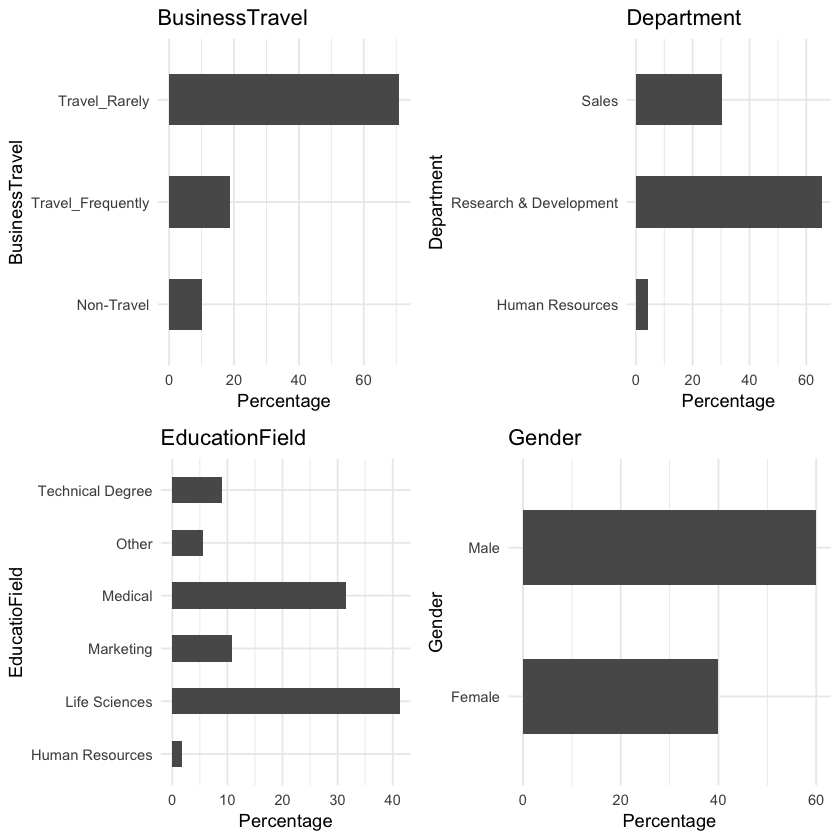

In [269]:
# Categorical variable analysis
p1 <- ggplot(data, aes(x=BusinessTravel)) + ggtitle("BusinessTravel") + xlab("BusinessTravel") +
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p2 <- ggplot(data, aes(x=Department)) + ggtitle("Department") + xlab("Department") + 
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p3 <- ggplot(data, aes(x=EducationField)) + ggtitle("EducationField") + xlab("EducatioField") + 
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
p4 <- ggplot(data, aes(x=Gender)) + ggtitle("Gender") + xlab("Gender") +
geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") + coord_flip() + theme_minimal()
grid.arrange(p1, p2, p3, p4, ncol=2)

In [270]:
data$Attrition <- ifelse(data$Attrition == "Yes",1,0)

In [271]:
head(data)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [272]:
data <- subset(data, select = - c(EmployeeCount,StandardHours,EmployeeNumber))

In [273]:
head(data)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6


In [277]:
colnames(data)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EnvironmentSatisfaction"  "Gender"                  
[11] "HourlyRate"               "JobInvolvement"          
[13] "JobLevel"                 "JobRole"                 
[15] "JobSatisfaction"          "MaritalStatus"           
[17] "MonthlyIncome"            "MonthlyRate"             
[19] "NumCompaniesWorked"       "Over18"                  
[21] "OverTime"                 "PercentSalaryHike"       
[23] "PerformanceRating"        "RelationshipSatisfaction"
[25] "StockOptionLevel"         "TotalWorkingYears"       
[27] "TrainingTimesLastYear"    "WorkLifeBalance"         
[29] "YearsAtCompany"           "YearsInCurrentRole"      
[31] "YearsSinceLastPromotion"  "YearsWithCurrManager"

In [275]:
str(data)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : num  1 0 1 0 0 0 0 0 0 0 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Factor w/ 5 levels "1","2","3","4",..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement          : Factor w/ 4 levels "1"

In [278]:
set.seed(823)
split <- sample.split(data, SplitRatio = 0.75)
train <- subset(data, split == "TRUE")
test <- subset(data, split == "FALSE")
str(train)
str(test)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


'data.frame':	1102 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 30 38 36 34 29 ...
 $ Attrition               : num  1 0 1 0 0 0 0 0 0 0 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 3 2 3 3 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1358 216 1299 1346 1389 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 24 23 27 19 21 ...
 $ Education               : Factor w/ 5 levels "1","2","3","4",..: 2 1 2 4 1 1 3 3 2 4 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 2 4 4 2 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 2 3 4 4 1 4 4 3 2 2 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 2 2 2 1 ...
 $ HourlyRate              : int  94 61 92 56 40 67 44 94 93 51 ...
 $ JobInvolvement          : Factor w/ 4 levels "

In [279]:
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                    Age               DailyRate        DistanceFromHome 
               1.771737                1.015282                1.018774 
             HourlyRate           MonthlyIncome             MonthlyRate 
               1.008392                2.183977                1.011621 
     NumCompaniesWorked       PercentSalaryHike       TotalWorkingYears 
               1.252181                1.013050                4.068056 
  TrainingTimesLastYear          YearsAtCompany      YearsInCurrentRole 
               1.010011                5.439560                2.463980 
YearsSinceLastPromotion    YearsWithCurrManager 
               2.669102                2.505352 


In [280]:
train <- subset(train, select = - c(MonthlyIncome))
test <- subset(test, select = - c(MonthlyIncome))

In [281]:
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                    Age               DailyRate        DistanceFromHome 
               1.779770                1.013591                1.016863 
             HourlyRate             MonthlyRate      NumCompaniesWorked 
               1.007837                1.010007                1.241128 
      PercentSalaryHike       TotalWorkingYears   TrainingTimesLastYear 
               1.011775                3.064411                1.009106 
         YearsAtCompany      YearsInCurrentRole YearsSinceLastPromotion 
               5.436606                2.448293                2.643848 
   YearsWithCurrManager 
               2.551246 


In [282]:
train <- subset(train, select = - c(YearsAtCompany))
test <- subset(test, select = - c(YearsAtCompany))

In [283]:
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                    Age               DailyRate        DistanceFromHome 
               1.772413                1.012587                1.015746 
             HourlyRate             MonthlyRate      NumCompaniesWorked 
               1.006929                1.009957                1.183237 
      PercentSalaryHike       TotalWorkingYears   TrainingTimesLastYear 
               1.011119                2.439721                1.009148 
     YearsInCurrentRole YearsSinceLastPromotion    YearsWithCurrManager 
               2.219746                2.129623                2.227195 


In [284]:
vif_output <- lm(Attrition ~., data = numerics)
vif_res <- car::vif(vif_output)
summary(vif_res)
print(vif_res)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.004   1.009   1.083   1.489   2.017   2.536 

                    Age               DailyRate        DistanceFromHome 
               1.927241                1.011106                1.009275 
             HourlyRate             MonthlyRate      NumCompaniesWorked 
               1.003575                1.007508                1.154419 
      PercentSalaryHike       TotalWorkingYears   TrainingTimesLastYear 
               1.005681                2.535625                1.009581 
     YearsInCurrentRole YearsSinceLastPromotion    YearsWithCurrManager 
               2.322142                1.594067                2.286028 


In [285]:
train <- subset(train, select = - c(JobInvolvement,
                                    JobSatisfaction,
                                    Education,
                                    PercentSalaryHike,
                                    RelationshipSatisfaction,
                                    EducationField,
                                    YearsSinceLastPromotion,
                                    HourlyRate,
                                    PerformanceRating,
                                    Over18,
                                    TrainingTimesLastYear,
                                    DailyRate,
                                    Gender))
test <- subset(test, select = - c(JobInvolvement,
                                  JobSatisfaction,
                                   Education,
                                   PercentSalaryHike,
                                   RelationshipSatisfaction,
                                   EducationField,
                                   YearsSinceLastPromotion,
                                   HourlyRate,
                                   PerformanceRating,
                                   Over18,
                                   TrainingTimesLastYear,
                                   DailyRate,
                                   Gender))

In [286]:
finalGlm <- glm(Attrition~., data = train, family = binomial(link="logit"))
print(finalGlm)


Call:  glm(formula = Attrition ~ ., family = binomial(link = "logit"), 
    data = train)

Coefficients:
                     (Intercept)                               Age  
                      -1.317e+01                        -3.380e-02  
 BusinessTravelTravel_Frequently       BusinessTravelTravel_Rarely  
                       1.603e+00                         7.973e-01  
DepartmentResearch & Development                   DepartmentSales  
                       1.336e+01                         1.338e+01  
                DistanceFromHome          EnvironmentSatisfaction2  
                       4.629e-02                        -1.062e+00  
        EnvironmentSatisfaction3          EnvironmentSatisfaction4  
                      -1.145e+00                        -1.137e+00  
                       JobLevel2                         JobLevel3  
                      -1.736e+00                        -1.310e-01  
                       JobLevel4                         JobLevel5

In [287]:
print(summary(finalGlm))


Call:
glm(formula = Attrition ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6707  -0.5093  -0.2728  -0.0970   3.2703  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.317e+01  6.465e+02  -0.020 0.983752    
Age                              -3.380e-02  1.535e-02  -2.202 0.027634 *  
BusinessTravelTravel_Frequently   1.603e+00  4.593e-01   3.491 0.000482 ***
BusinessTravelTravel_Rarely       7.973e-01  4.309e-01   1.850 0.064283 .  
DepartmentResearch & Development  1.336e+01  6.465e+02   0.021 0.983508    
DepartmentSales                   1.338e+01  6.465e+02   0.021 0.983486    
DistanceFromHome                  4.629e-02  1.242e-02   3.728 0.000193 ***
EnvironmentSatisfaction2         -1.062e+00  2.991e-01  -3.550 0.000386 ***
EnvironmentSatisfaction3         -1.145e+00  2.772e-01  -4.131 3.62e-05 ***
EnvironmentSatisfacti

In [290]:
thresh <- 0.5
predictedAttritionNumLog <- predict(finalGlm,newdata=test,type='response')
predictedAttritionLog <- ifelse(predictedAttritionNumLog > thresh,1,0) 
test$predictedAttrition <- predictedAttritionLog

In [293]:
u <- union(test$predictedAttrition, test$Attrition)
t <- table(factor(test$predictedAttrition, u), factor(test$Attrition, u))
confusionMatrix(t)

Confusion Matrix and Statistics

   
      0   1
  0 297  30
  1  15  26
                                          
               Accuracy : 0.8777          
                 95% CI : (0.8398, 0.9094)
    No Information Rate : 0.8478          
    P-Value [Acc > NIR] : 0.06070         
                                          
                  Kappa : 0.4676          
                                          
 Mcnemar's Test P-Value : 0.03689         
                                          
            Sensitivity : 0.9519          
            Specificity : 0.4643          
         Pos Pred Value : 0.9083          
         Neg Pred Value : 0.6341          
             Prevalence : 0.8478          
         Detection Rate : 0.8071          
   Detection Prevalence : 0.8886          
      Balanced Accuracy : 0.7081          
                                          
       'Positive' Class : 0               
                                          

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


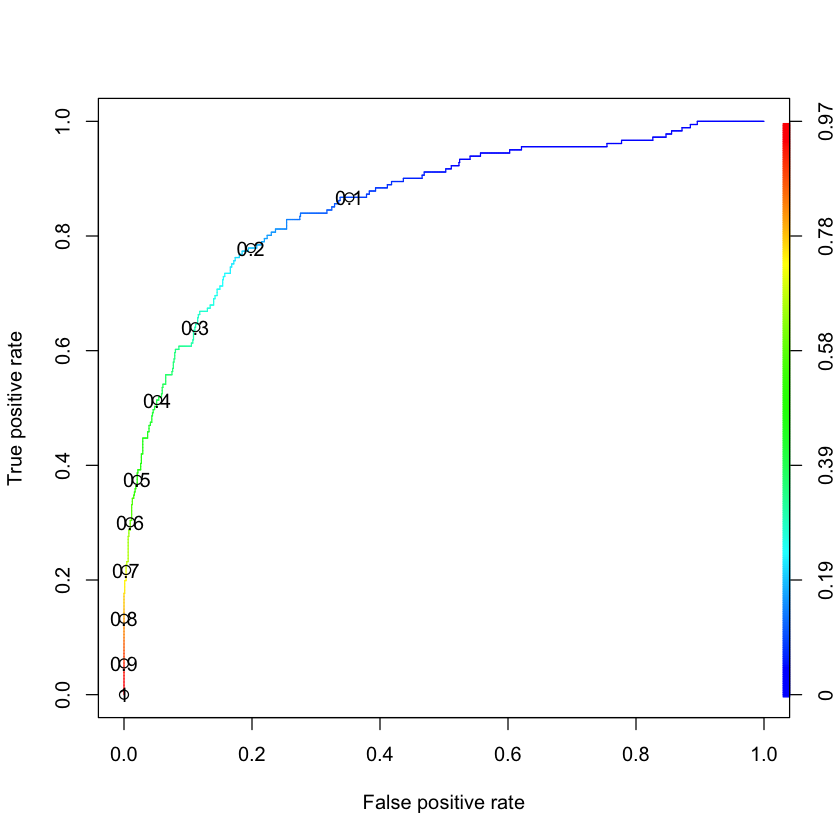

In [295]:
res <- predict(finalGlm, train, type = "response")
ROCRPred <- prediction(res, train$Attrition)
ROCRPerf <- performance(ROCRPred,"tpr","fpr")
plot(ROCRPerf,colorize = TRUE, print.cutoffs.at = seq(0.1, by = 0.1))

In [296]:
results <- predict(finalGlm,newdata=test,type='response')
results <- ifelse(results>=0.2,1,0)
print("confusion matrix for Logistic Regression")
table(Actual_value = test$Attrition,Predicted_value = results > 0.2)
misClasificError1 <- mean(results != test$Attrition)
print(paste('Logistic Regression Accuracy',1-misClasificError1))

[1] "confusion matrix for Logistic Regression"


            Predicted_value
Actual_value FALSE TRUE
           0   243   69
           1    14   42

[1] "Logistic Regression Accuracy 0.77445652173913"
